# MSRI-UP Introduction to Parking functions using sage!

This tutorial aims to introduce students to the basic commands and syntax for computing parking function 

#### References:
- http://doc.sagemath.org/html/en/reference/combinat/sage/combinat/non_decreasing_parking_function.html
- http://doc.sagemath.org/html/en/reference/combinat/sage/combinat/parking_functions.html
- http://doc.sagemath.org/html/en/reference/combinat/sage/combinat/dyck_word.html
- http://doc.sagemath.org/html/en/reference/combinat/sage/combinat/permutation.html



### Writing comments in the Jupyter

*Your future self will thank you for adding comments for everything you do*

#### References:
 - https://help.github.com/en/articles/basic-writing-and-formatting-syntax
 - https://www.ibm.com/support/knowledgecenter/en/SSGNPV_1.1.3/dsx/markd-jupyter.html

1. Headings
    - The largest heading has just one # and each subheading just have #, i.e the largest heading begins with just one #, the subheading starts with two ## , the subsubheading starts with three ###, etc.
    
2. Bold text and emphasis
    - To make comments bold use `**BOLD_TEXT_HERE**`
    - To italicize comments use `*ITALICIZED_TEXT_HERE*`
    
3. Writing math
    - You can type math, just start and end it with `$`'s  `$MATH_TEXT_HERE$`

4. Writing code/monospace font
    - To make comments look as it appears in the code cells use the grave accent ` before and after what you would like to put in this format

5. Numbering and bullet points
    - A hyphen `-` or asterisk `*` followed by one or two spaces and then text creates a bullet point
        - Sub bullet points are created in the same way, but using an indent<br>
        `- Bullet point
            -Sub bullet point`

## Writing code and evaluating cells

- Sage is based on the python language and use SHIFT + RETURN to evaluate cells
- `#` is used in front of code that you want to comment out
- If you forget the command or just want to see what command are available for a certain object, you can hit TAB and sage will try to auto complete the command

## Parking Functions

### Defining a parking function
- For parking function we can choose some letter or name to store it as, such as `alpha` in the example below. 

In [210]:
alpha=ParkingFunction([3,3,2,1])
alpha

[3, 3, 2, 1]

In [ ]:
# Write "alpha." and hit tab to see what commands are available

Sage will give you an error if you enter a parking preference is not a parking  parking function, i.e. the increasing rearrangement $\beta=(b_1,b_2,\dots,b_n)$ has $b_i>i$ for some $i$.

In [70]:
ParkingFunction([3,2,3])
# Correct the parking preference to make it a parking function so that it does not return an error

ValueError: [3, 2, 3] is not a parking function.

### The non-decreasing rearrangement of a parking function

Given a parking function $\alpha=(a_1,a_2,\dots,a_n)$ there is a non-decreasing rearrangement $\beta=(b_1,\dots, b_n)$, where $b_i\leq b_{i+1}$ for each $1\leq i\leq n-1$. Recall that if $\alpha$ is a parking function then $b_i\leq i$ for each $1\leq i\leq n$

In [139]:
beta=alpha.to_NonDecreasingParkingFunction()
beta

[1, 2, 3, 3]

`NonDecreasingParkingFunctions(n)` returns the set of non-decreasing parking functions of length $n$. See below for the list of 

Modify the code below to list the non-decreasing parking functions of length 4. 

In [96]:
NDPF=NonDecreasingParkingFunctions(3)
NDPF.list()

[[1, 1, 1], [1, 1, 2], [1, 1, 3], [1, 2, 2], [1, 2, 3]]

### Statistics about Parking functions

#### Jumps

Here we define a parking function $\gamma=(1,4,3,2,6,4,2)$ of length 7. We have that the corresponding order that the cars park in is $1, 4, 3, 2, 6, 5, 7$, i.e. Car 1 parks in spot 1, Car 2 in spot 4, Car 3 in spot 3, etc.

In [203]:
gamma=ParkingFunction([1,4,3,2,6,4,2])
gamma.parking_permutation()

[1, 4, 3, 2, 6, 5, 7]

For $\gamma$ the first 5 cars all get to park in their desired spaces cf. above. Car 6 however wants to park in 

- `PARKING_PERMUTATION.jump()` returns the sum of the differences between the parked and preferred parking spots.
- `PARKING_PERMUTATION.jump_list()` returns an $n$-tuple where the $i$-th entry is the difference between the parked and preferred parking spots of car $i$

In [142]:
gamma.jump()

6

In [144]:
gamma.jump_list()

[0, 0, 0, 0, 0, 1, 5]

Notice the sum of the jumps of $\gamma$ at index 6 and 7 is equal to the sum of the entries of the jump list

## Finding the permutation of the cars corresponding to the parking function

Given a parking function we can determine the "permutation" what parking order the cars park in, e.g. if $\alpha=(3,3,2,1)\in \text{PF}_n$ then car 1 parks in spot 3, car 2 parks in spot 4, car 3 parks in spot 2, and car 4 parks in spot 1. We say the corresponding permutation $\sigma$ of the 4 cars is `[4,3,1,2]`

In [80]:
sigma=alpha.cars_permutation()
sigma

[4, 3, 1, 2]

To store a permutation `x` as a permutation instead of an ordered list you need to use `Permutation([x])`. There are added functions and things that can be done with a permutation instead of an ordered list 

In [204]:
tau=Permutation([4,3,2,5,1])
T=[4,3,2,5,1]

True

## Bijection with (labeled) Dyck paths
Note the difference to the Dyck paths that we saw in class:
- We still use paths with steps east and north, but now we stay weakly **above** the line $y=x$
- The bijective map from Dyck paths to non-decreasing parking functions is given by listing 

Recall $\alpha$ is the parking function $\alpha=(3,3,2,1)$

In [212]:
alpha

[3, 3, 2, 1]

And $\alpha=(3,3,2,1)$ has increasing rearrangement $\beta=(1,2,3,3)$

In [225]:
beta=alpha.to_NonDecreasingParkingFunction()
beta

[1, 2, 3, 3]

Return the dyck word corresponding to the increasing rearrangement of $\alpha$ using `PARKING_FUNCTION.to_dyck_word()`. Here 1's correspond to steps north and 0's correspond to steps east. Thus $\alpha=(3,3,2,1)$ and $\beta=(1,2,3,3)$ correspond to Dyck word $(1,0,1,0,1,1,0,0)$ since they are just rearrangements of each other


In [227]:
alpha.to_dyck_word()

[1, 0, 1, 0, 1, 1, 0, 0]

In [228]:
beta.to_dyck_word()

[1, 0, 1, 0, 1, 1, 0, 0]

To draw the Dyck Path use `DYCK_WORD.pretty_print()`

In [219]:
alpha.to_dyck_word().pretty_print()

     ___
    | x 
   _|  .
 _|  . .
|  . . .



In [6]:
for D in DyckWords(3): 
    D.pretty_print()
    

     _
   _| 
 _|  .
|  . .

   ___
  | x 
 _|  .
|  . .

     _
 ___| 
| x  .
|  . .

   ___
 _| x 
| x  .
|  . .

 _____
| x x 
| x  .
|  . .



Sometimes Dyck paths are drawn such that the 1's correspond to steps up and to the right (move by (1,1)) and 0's correspond to steps down and to the right (move by $(1,-1)$). Then the Dyck paths are paths that begin and end on the $x$-axis that follow these steps and stay weakly above the $x$-axis

In [232]:
print(alpha.to_dyck_word().to_path_string())

     /\ 
/\/\/  \


In [243]:
for D in DyckWords(3): 
    print(D.to_path_string())

/\/\/\
   /\ 
/\/  \
 /\   
/  \/\
 /\/\ 
/    \
  /\  
 /  \ 
/    \


Also we can use `.plot()` to draw the Dyck path

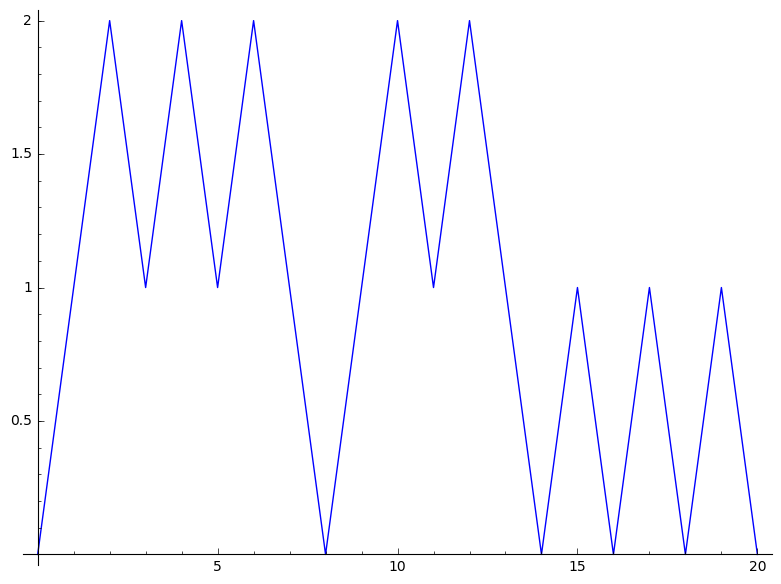

In [275]:
DyckWords(10).random_element().plot()

#### *Labled* Dyck paths

Return the labeled dyck word corresponding to the parking function $\alpha$ using `PARKING_FUNCTION.to_dyck_word()`
- Here the 0's correspond to steps east and the positive integers correspond to steps north with that label

In [211]:
alpha.to_labelled_dyck_word()

[4, 0, 3, 0, 1, 2, 0, 0]

In [149]:
alpha.pretty_print()

     ___
    |2x 
   _|1 .
 _|3 . .
|4 . . .



**Exercise:** What is the Parking function corresponding to the labelled Dyck word $(3, 6, 0, 4, 0, 2, 0, 1, 5, 0, 0, 0)$

In [244]:
#Use the commands above to check that the parking function you found corresponds to the above Dyck word

From a DyckWord you can return all of the parking functions corresponding to that Dyck word. Remember a A Dyck word

In [247]:
DyckWord([1,1,0,0,1,0]).list_parking_functions().list()

[[1, 1, 3], [1, 3, 1], [3, 1, 1]]